# Image Processing Mini Tasks using OpenCV

This notebook demonstrates several core image processing techniques using the OpenCV library, including:
1. **Edge Detection** using the Canny algorithm.
2. **Image Thresholding** (Binary, Otsu, and Adaptive).
3. **Image Augmentation** (Flip, Rotate, and Brightness adjustment).

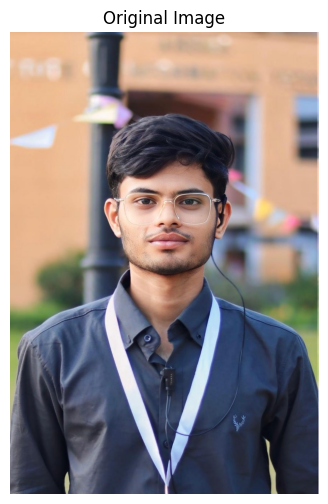

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


def show_image(image, title='Image', cmap=None):
    plt.figure(figsize=(8, 6))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap=cmap if cmap else 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


img = cv2.imread('sample_image.png')
show_image(img, 'Original Image')

## 1. Edge Detection (Canny)

The Canny edge detector is a multi-stage algorithm to detect a wide range of edges in images. It involves noise reduction, finding intensity gradients, non-maximum suppression, and hysteresis thresholding.

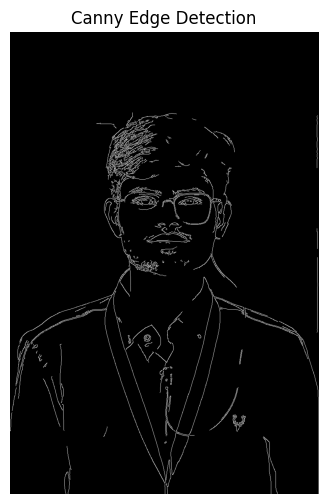

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

show_image(edges, 'Canny Edge Detection')

## 2. Image Thresholding

Thresholding is used to create binary images from grayscale images.

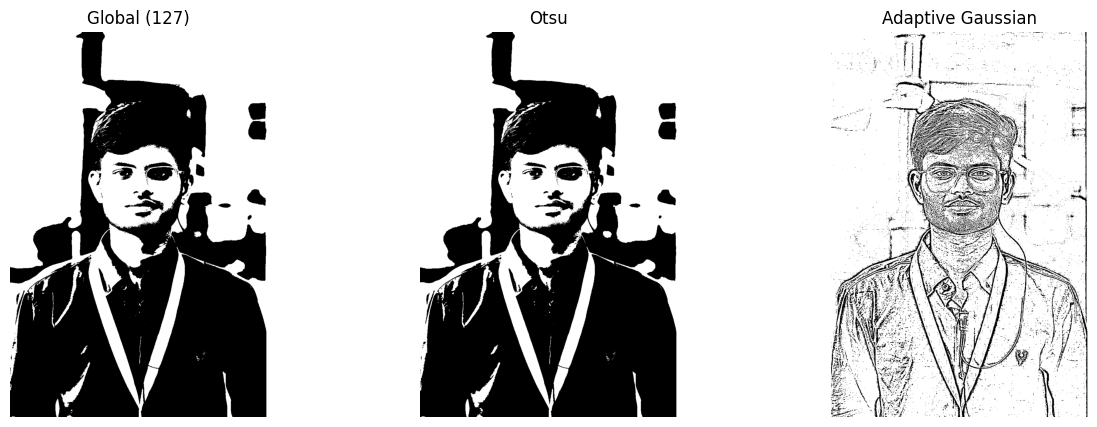

In [ ]:

ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


ret2, thresh2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


thresh3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(thresh1, 'gray'), plt.title('Global (127)'), plt.axis('off')
plt.subplot(132), plt.imshow(thresh2, 'gray'), plt.title('Otsu'), plt.axis('off')
plt.subplot(133), plt.imshow(thresh3, 'gray'), plt.title('Adaptive Gaussian'), plt.axis('off')
plt.show()

## 3. Image Augmentation

Data augmentation is essential for training robust machine learning models.

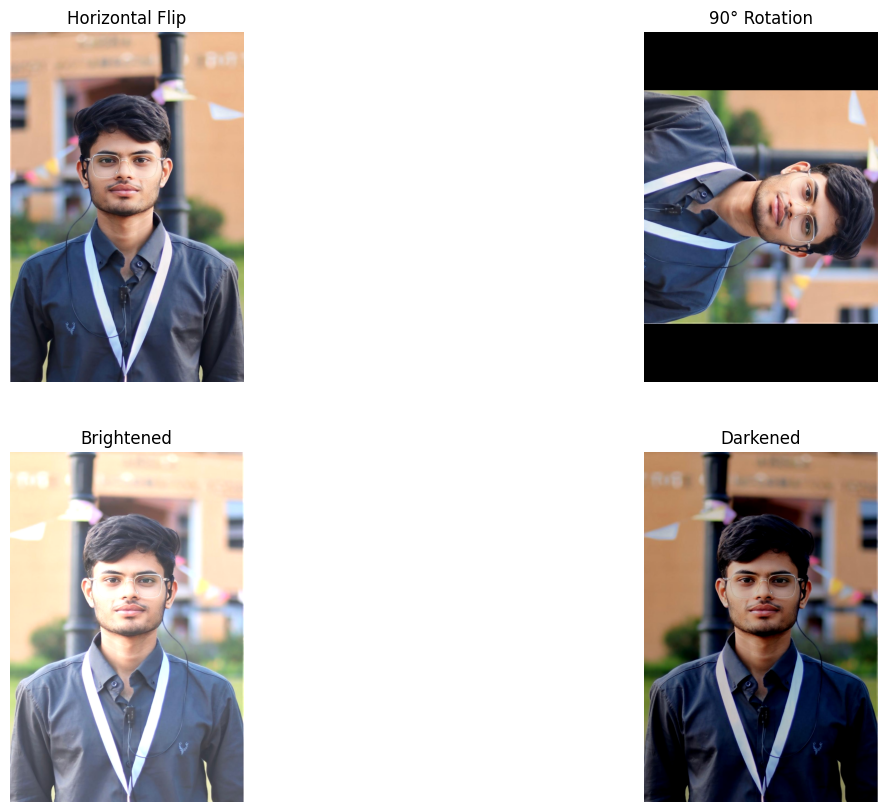

In [ ]:

flipped = cv2.flip(img, 1)


height, width = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), -90, 1)
rotated = cv2.warpAffine(img, rotation_matrix, (width, height))


matrix = np.ones(img.shape, dtype="uint8") * 50
brightened = cv2.add(img, matrix)
darkened = cv2.subtract(img, matrix)

plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title('Horizontal Flip'), plt.axis('off')
plt.subplot(222), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title('90° Rotation'), plt.axis('off')
plt.subplot(223), plt.imshow(cv2.cvtColor(brightened, cv2.COLOR_BGR2RGB)), plt.title('Brightened'), plt.axis('off')
plt.subplot(224), plt.imshow(cv2.cvtColor(darkened, cv2.COLOR_BGR2RGB)), plt.title('Darkened'), plt.axis('off')
plt.show()